In [19]:
import random
import inspyred
from inspyred import ec
from inspyred.ec import selectors, terminators
import matplotlib.pyplot as plt
import numpy as np
import time
#from scipy.stats import wilcoxon

Metaheuristico

In [20]:
import functools

@functools.total_ordering
class Lexicographic(object):
    def __init__(self, values=None, maximize=True):
        if values is None:
            values = []
        self.values = values
        try:
            iter(maximize)
        except TypeError:
            maximize = [maximize for v in values]
        self.maximize = maximize

    def __len__(self):
        return len(self.values)
    
    def __getitem__(self, key):
        return self.values[key]
        
    def __iter__(self):
        return iter(self.values)
        
    def __lt__(self, other):
        for v, o, m in zip(self.values, other.values, self.maximize):
            if m:
                if v < o:
                    return True
                elif v > o:
                    return False
            else:
                if v > o:
                    return True
                elif v < o:
                    return False
        return False

    def __eq__(self, other):
        return (self.values == other.values and self.maximize == other.maximize)

    def __str__(self):
        return str(self.values)
        
    def __repr__(self):
        return str(self.values)

In [36]:
def arreglo_mut(matriz, sumas_filas, sumas_columnas): #Modificar
    suma_filas = [sum(fila) for fila in matriz]
    resta_filas = [a - b for a, b in zip(suma_filas, sumas_filas)]
    
    while not(all(elemento == 0 for elemento in resta_filas)):
        for i in range(len(resta_filas)):
            if resta_filas[i] > 0:
                pos_cand = [1] if 1 in matriz[i] else []
                pos_cand.append(max(matriz[i]))
                j = matriz[i].index(random.choice(pos_cand))
                matriz[i][j] -= 1
                resta_filas[i] -= 1
                
            elif resta_filas[i] < 0:
                m_sin_cero = [elemento for elemento in matriz[i] if elemento != 0]
                if len(m_sin_cero) != 0:
                    j = matriz[i].index(min(m_sin_cero))
                else:
                    j = random.randint(0, (len(matriz[i])-1))
                matriz[i][j] += 1
                resta_filas[i] += 1
            
    suma_columnas = [sum(fila) for fila in zip(*matriz)]
    resta_columnas = [a - b for a, b in zip(suma_columnas, sumas_columnas)]
    
    while not(all(elemento == 0 for elemento in resta_columnas)):
        for i in range(len(resta_columnas)):
            if resta_columnas[i] > 0:
                i1 = resta_columnas.index(min(resta_columnas))
                columna = [fila[i] for fila in matriz]
                m_sin_cero = [elemento for elemento in columna if elemento != 0]
                #j = columna.index(max(columna))
                j = columna.index(random.choice(m_sin_cero))
                matriz[j][i] -= 1
                matriz[j][i1] += 1
                resta_columnas[i] -= 1
                resta_columnas[i1] += 1
    #print(max(resta_filas), max(resta_columnas))
    #print(matriz)
    return np.array(matriz)





def arreglo(random, candidates, args): #Modificar
    for matriz in candidates:
        suma_filas = [sum(fila) for fila in matriz]
        resta_filas = [a - b for a, b in zip(suma_filas, sumas_filas)]

        while not(all(elemento == 0 for elemento in resta_filas)):
            for i in range(len(resta_filas)):
                if resta_filas[i] > 0:
                    pos_cand = [1] if 1 in matriz[i] else []
                    pos_cand.append(max(matriz[i]))
                    #j = matriz[i].index(random.choice(pos_cand))
                    j = np.where(matriz[i] == random.choice(pos_cand))[0][0]
                    matriz[i][j] -= 1
                    resta_filas[i] -= 1

                elif resta_filas[i] < 0:
                    m_sin_cero = [elemento for elemento in matriz[i] if elemento != 0]
                    if len(m_sin_cero) != 0:
                        #j = matriz[i].index(min(m_sin_cero))
                        j = np.where(matriz[i] == min(m_sin_cero))[0][0]
                    else:
                        j = random.randint(0, (len(matriz[i])-1))
                    matriz[i][j] += 1
                    resta_filas[i] += 1

        suma_columnas = [sum(fila) for fila in zip(*matriz)]
        resta_columnas = [a - b for a, b in zip(suma_columnas, sumas_columnas)]

        while not(all(elemento == 0 for elemento in resta_columnas)):
            for i in range(len(resta_columnas)):
                if resta_columnas[i] > 0:
                    #i1 = resta_columnas.index(min(resta_columnas))
                    i1 = np.where(resta_columnas == min(resta_columnas))[0][0]
                    columna = [fila[i] for fila in matriz]
                    m_sin_cero = [elemento for elemento in columna if elemento != 0]
                    #j = columna.index(max(columna))
                    #j = columna.index(random.choice(m_sin_cero))
                    j = np.where(columna == random.choice(m_sin_cero))[0][0]
                    matriz[j][i] -= 1
                    matriz[j][i1] += 1
                    resta_columnas[i] -= 1
                    resta_columnas[i1] += 1
        #print(max(resta_filas), max(resta_columnas))
        #print(matriz)
    return candidates

def generator(random, args):
    """Generates a candidate solution as a list of three integers"""
    m = [random.randint(0, maximo_numero) for _ in range(tamano)]
    return np.array(m).reshape(len(sumas_filas),len(sumas_columnas))

def generator1(random, args):
    n = len(sumas_filas)
    m = len(sumas_columnas)
    
    while True:
        sf = sumas_filas.copy()
        sc = sumas_columnas.copy()
        a = [[0] * m for _ in range(n)]
        nf = random.randint(0, n)
        nc = random.randint(0, m)
    
        for i in range (n):
            for j in range (m):
                i = (i + nf)%n
                j = (j + nc)%m
    
                num = random.randint(0, min(sf[i],sc[j]))
                a[i][j] = num
                sf[i] -= num
                sc[j] -= num
                
        if sum(matriz_a_lista(a)) == sum(sumas_filas):
            return a
        
        
        
def generator2(random, args):
    n = len(sumas_filas)
    m = len(sumas_columnas)
    

    sf = sumas_filas.copy()
    sc = sumas_columnas.copy()
    a = [[0] * m for _ in range(n)]
    nf = random.randint(0, n)
    nc = random.randint(0, m)

    for i in range (n):
        for j in range (m):
            i = (i + nf)%n
            j = (j + nc)%m

            num = random.randint(0, min(sf[i],sc[j]))
            a[i][j] = num
            sf[i] -= num
            sc[j] -= num
            
    return a



def evaluator(candidates, args):
    """Evaluates the fitness of each candidate solution"""
    fitness = []
    for candidate in candidates:
        sumas_filas1, sumas_columnas1 = sumar_filas_y_columnas_matriz(candidate)
        suma_f1 = sum(sumas_filas1)
        suma_c1 = sum(sumas_columnas1)


        if sumas_filas1 == sumas_filas and sumas_columnas1 == sumas_columnas:        
            constante = suma_f * 10**(maximo_numero + p_doble_cero - 2)
            a = contar_frecuencias_matriz(candidate, maximo_numero)
            primera_parte = ['0' + str(num) if num < 10 else str(num) for num in a[:p_doble_cero]]
            segunda_parte = [str(num) for num in a[p_doble_cero:]]
            numero_entero = ''.join(primera_parte) + ''.join(segunda_parte)
            numero_entero = int(numero_entero)
            s = 1000 + (constante - numero_entero)/(constante/1000)
            s1 = ((s**2)/1000)-2*s + 2000
            fitness.append(s1)
            #s = Decimal('1000') + (constante - numero_entero) / (constante / Decimal('1000'))
            #s1 = ((s**2) / Decimal('1000')) - Decimal('2') * s + Decimal('2000')
        
            #fitness.append(float(s1))  # Convierte a float si se requiere devolver un float

        
    
    
        else:
            f = 0
            c = 0
            for i in range(len(sumas_filas1)):
                f += (abs(sumas_filas1[i] - sumas_filas[i]))
            for j in range(len(sumas_columnas1)):
                c += (abs(sumas_columnas1[j] - sumas_columnas[j]))        
            fitness.append((abs(f + c - base)**2)/divisor)  
    return fitness


def evaluator_v2(candidates, args):
    """Evaluates the fitness of each candidate solution"""
    fitness = []
    for candidate in candidates:
        sumas_filas1, sumas_columnas1 = sumar_filas_y_columnas_matriz(candidate)
        suma_f1 = sum(sumas_filas1)
        suma_c1 = sum(sumas_columnas1)


        if sumas_filas1 == sumas_filas and sumas_columnas1 == sumas_columnas:        
            constante = suma_f * 10**(maximo_numero + p_doble_cero - 2)
            a = [0] + contar_frecuencias_matriz(candidate, maximo_numero)
            fitness.append(Lexicographic(a, maximize=False))

            #primera_parte = ['0' + str(num) if num < 10 else str(num) for num in a[:p_doble_cero]]
            #segunda_parte = [str(num) for num in a[p_doble_cero:]]
            #numero_entero = ''.join(primera_parte) + ''.join(segunda_parte)
            #numero_entero = int(numero_entero)
            #s = 1000 + (constante - numero_entero)/(constante/1000)
            #s1 = ((s**2)/1000)-2*s + 2000
            #s = Decimal('1000') + (constante - numero_entero) / (constante / Decimal('1000'))
            #s1 = ((s**2) / Decimal('1000')) - Decimal('2') * s + Decimal('2000')
        
            #fitness.append(float(s1))  # Convierte a float si se requiere devolver un float

        
    
    
        else:
            f = 0
            c = 0
            for i in range(len(sumas_filas1)):
                f += (abs(sumas_filas1[i] - sumas_filas[i]))
            for j in range(len(sumas_columnas1)):
                c += (abs(sumas_columnas1[j] - sumas_columnas[j])) 
            a = [f + c] + contar_frecuencias_matriz(candidate, maximo_numero)
            fitness.append(Lexicographic(a, maximize=False))  
    return fitness


def custom_mutation_celda(random, candidates, args):
    """Custom mutation function to ensure integers in the matrix"""
    mutation_rate = args.get('mutation_rate', 0.1)
    bounder = args['_ec'].bounder
    m = args.get('num_rows', n_filas)
    n = args.get('num_cols', n_columnas)
    for i, candidate in enumerate(candidates):
        for j in range (m):
            for k in range (n):
                if random.random() < mutation_rate:
                    candidate[j][k] = random.randint(bounder.lower_bound[0], bounder.upper_bound[0])
            
        candidates[i] = candidate

    return candidates




def custom_mutation1(random, candidates, args):
    """Custom mutation function to ensure integers in the matrix"""
    mutation_rate = args.get('mutation_rate', 0.1)
    bounder = args['_ec'].bounder
    m = args.get('num_rows', n_filas)
    n = args.get('num_cols', n_columnas)
    for i, candidate in enumerate(candidates):
        if random.random() < mutation_rate:
            mutate_row = random.randint(0, m - 1)
            mutate_col = random.randint(0, n - 1)
            candidate[mutate_row][mutate_col] = random.randint(bounder.lower_bound[0], bounder.upper_bound[0])
            candidate = arreglo_mut(candidate.tolist(), sumas_filas, sumas_columnas)
            
        candidates[i] = candidate

    return candidates


def custom_mutation(random, candidates, args):
    """Custom mutation function to ensure integers in the matrix"""
    mutation_rate = args.get('mutation_rate', 0.1)
    bounder = args['_ec'].bounder
    m = args.get('num_rows', n_filas)
    n = args.get('num_cols', n_columnas)
    for i, candidate in enumerate(candidates):
        if random.random() < mutation_rate:
            mutate_row = random.randint(0, m - 1)
            mutate_col = random.randint(0, n - 1)
            candidate[mutate_row][mutate_col] = random.randint(bounder.lower_bound[0], bounder.upper_bound[0])
            
        candidates[i] = candidate

    return candidates



def custom_crossover(random, parents, args):
    """Custom crossover function for matrix candidates"""
    parent1, parent2 = parents
    m = len(parent1)
    n = len(parent1[0])
    crossover_point = random.randint(1, m * n - 1)
    child1 = [x for sublist in parent1[:crossover_point // n] + parent2[crossover_point // n:] for x in sublist]
    child2 = [x for sublist in parent2[:crossover_point // n] + parent1[crossover_point // n:] for x in sublist]
    return [child1, child2]

# Observer to collect the best fitness in each generation
class FitnessObserver:
    def __init__(self):
        self.best_fitness_per_gen = []
        self.mean_fitness_per_gen = []
        self.worst_fitness_per_gen = []
        self.__name__ = "FitnessObserver"  # Add this line to avoid AttributeError

    def __call__(self, population, num_generations, num_evaluations, args):
        best_fitness = max(population).fitness
        worst_fitness = min(population).fitness
        mean_fitness = np.mean([ind.fitness for ind in population])
        self.best_fitness_per_gen.append(best_fitness)
        self.mean_fitness_per_gen.append(mean_fitness)
        self.worst_fitness_per_gen.append(worst_fitness)

In [37]:
def generar_fibonacci(n):
    n = n + 2
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    
    fibonacci = [0, 1]
    for i in range(2, n):
        siguiente = fibonacci[-1] + fibonacci[-2]
        fibonacci.append(siguiente)
    return fibonacci[2:]


def generar_lista_incremental(n):
    if n <= 0:
        return []
    
    lista = [1]  # Inicia la lista con el primer número de la secuencia
    incremento = 1  # Inicia el primer incremento en 1
    inc = 1
    
    for i in range(1, n):
        siguiente_numero = lista[-1] + incremento
        lista.append(siguiente_numero)
        incremento += inc  # Incrementa el incremento en 1 cada vez
    
    return lista


def contar_frecuencias(lista, max_numero):
    frecuencias = [0] * (max_numero + 1)  
    for numero in lista:  
        frecuencias[numero] += 1  
    return frecuencias[1:]

def contar_frecuencias_matriz(matriz, max_numero):
    frecuencias = [0] * (max_numero + 1) 
    lista = matriz_a_lista(matriz)
    for numero in lista:  
        frecuencias[numero] += 1  
    return frecuencias[1:]


def sumar_filas_columnas(matriz, filas, columnas):
    sumas_filas = [0] * filas
    sumas_columnas = [0] * columnas

    for i in range(filas):  
        for j in range(columnas):
            valor = matriz[(i * columnas) + j]
            sumas_filas[i] += valor
            sumas_columnas[j] += valor

    return sumas_filas, sumas_columnas


def sumar_filas_y_columnas_matriz(matriz):
    num_filas = len(matriz)
    num_columnas = len(matriz[0])  # Suponemos que todas las filas tienen la misma longitud
    
    suma_filas = [sum(fila) for fila in matriz]
    
    suma_columnas = [0] * num_columnas
    for fila in matriz:
        for j in range(num_columnas):
            suma_columnas[j] += fila[j]
    
    return suma_filas, suma_columnas


def matriz_a_lista(matriz):
    lista = [elemento for fila in matriz for elemento in fila]
    return lista


def custom_termination(population, num_generations, num_evaluations, args):
    max_generations = args.get('max_generations', 1000)  # Obtener el número máximo de generaciones
    target_fitness = args.get('target_fitness', 2000)  # Obtener el fitness objetivo
    
    # Verificar si se han alcanzado las generaciones máximas
    if num_generations >= max_generations:
        return True
    
    # Verificar si se ha alcanzado el fitness objetivo
    for ind in population:
        if ind.fitness >= target_fitness:
            return True
    
    return False


Pruebas

In [38]:
#sumas_filas = [47, 83, 91, 67, 212, 47, 83, 91, 68, 211]
#sumas_columnas = [53, 87, 61, 79, 101, 119, 53, 87, 61, 79, 102, 118]

#sumas_filas = [67, 65, 74, 63, 67, 56, 57, 51]
#sumas_columnas = [56, 47, 22, 90, 27, 50, 42, 51, 15, 43, 57]

#sumas_filas = [47, 83, 91, 67, 262]
#sumas_columnas = [53, 87, 61, 79, 101, 169]

#sumas_filas =  [20, 11, 16]
#sumas_columnas = [18, 19, 10]

#sumas_filas = [23, 37, 45, 18, 77]
#sumas_columnas = [13, 27, 35, 18, 42, 65]

#sumas_filas = [23, 37, 15, 44, 31, 20, 30]
#sumas_columnas = [13, 27, 35, 18, 42, 10, 25, 30]

#sumas_filas =  [16, 11, 13, 16, 11, 16, 7, 10]
#sumas_columnas = [6, 4, 7, 4, 10, 9, 4, 6, 4, 6, 6, 3, 5, 7, 9, 10]

#sumas_filas = [3, 5, 6, 2, 6, 3, 2, 4, 5, 3, 5, 2, 2, 2]
#sumas_columnas = [7, 4, 5, 9, 6, 4, 9, 3, 3]

sumas_filas = [4, 4, 5, 2]
sumas_columnas = [4, 2, 4, 3, 2]

#sumas_filas = [101, 89, 113, 77, 73, 97, 91, 59, 53, 47, 200]
#sumas_columnas = [201, 179, 157, 139, 103, 101, 61, 26, 33]

#sumas_filas = [5, 4, 7, 5, 9, 9, 5, 6]
#sumas_columnas = [5, 15, 4, 6, 13, 7]

#sumas_filas = [5, 4, 7, 5, 9]
#sumas_columnas = [5, 15, 4, 6]

N = sum(sumas_filas)
n_filas = len(sumas_filas)
n_columnas = len(sumas_columnas)
suma_f = sum(sumas_filas)
suma_c = sum(sumas_columnas)
tamano = n_filas * n_columnas
maximo_numero = max(max(sumas_filas), max(sumas_columnas))
p_doble_cero = tamano//10

#lista_descendente = generar_fibonacci(maximo_numero)[::-1]
#lista_descendente = generar_lista_incremental(maximo_numero)[::-1]
#base1 = N*lista_descendente[0]

base = tamano*maximo_numero
divisor = (base**2)/1000

No Lexicografico


In [39]:
random.seed(42)


# Create the evolutionary computation object
ea = inspyred.ec.GA(random)
ea.selector = selectors.tournament_selection
#ea.terminator = terminators.generation_termination
ea.terminator = custom_termination

# Create and add the custom observer

fitness_observer = FitnessObserver()
ea.observer = [fitness_observer, inspyred.ec.observers.stats_observer]
# Set the variators (crossover and custom mutation)

#ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo]
ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]
#ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]
# Run the algorithm
final_pop = ea.evolve(generator=generator,
                      evaluator=evaluator,
                      pop_size=100,
                      maximize=True,
                      bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                      max_evaluations=1000,
                      max_generations=1000,
                      crossover_rate=1,
                      mutation_rate=1,
                      num_rows=n_filas,  # Set number of rows in the matrix
                      num_cols=n_columnas, # Set number of columns in the matrix
                      num_elites = 1,
                      target_fitness=2000)

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         0        100        0.4      384.4       78.4 100.148000 89.6608303

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         1        200 1070.40177 1864.88760 1281.60711 1318.10460 183.725195

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         2        300 1070.40177 1864.88760 1357.52427 1380.05712 174.070121

Generation Evaluation      Worst       Best     Median    Average    Std Dev
---------- ---------- ---------- ---------- ---------- ---------- ----------
         3        400 1070.40177 1991.88320 1357.52427 1398.13500 203.074601

Generation Evaluation      Worst       Best     Median    Average    Std

Best Fitness:
1997.175330844444

Best Solution
   [0, 2, 1, 2, 0]

   4   0   0   0   0
   0   0   4   0   0
   0   2   0   3   0
   0   0   0   0   2



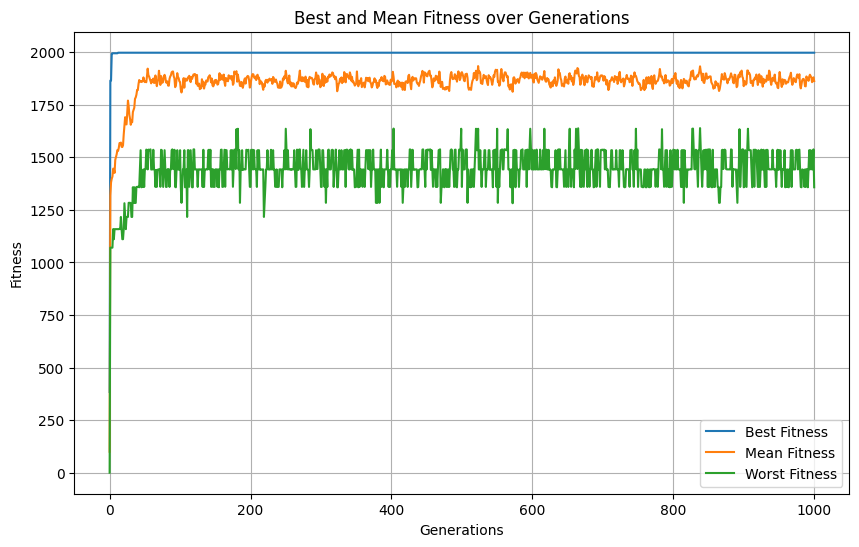

In [40]:
# Sort and print the best solution
best = max(ea.population)
mejor1 = best.candidate
mejor = matriz_a_lista(mejor1)
print(f'Best Fitness:')
print(best.fitness)
print()
print('Best Solution')
f = contar_frecuencias(mejor, maximo_numero)
res = ""
res += '   ' + str(f) + "\n" + "\n"
for i in range(n_filas):
    for j in range(n_columnas):
        res += "%4s" % (mejor[(i * n_columnas) + j])
    res += "\n"
print(res)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(fitness_observer.best_fitness_per_gen, label='Best Fitness')
plt.plot(fitness_observer.mean_fitness_per_gen, label='Mean Fitness')
plt.plot(fitness_observer.worst_fitness_per_gen, label='Worst Fitness')
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Best and Mean Fitness over Generations')
plt.legend()
plt.grid(True)
plt.show()

Lexicografico

In [41]:
random.seed(42)


# Create the evolutionary computation object
ea = inspyred.ec.GA(random)
ea.selector = selectors.tournament_selection
ea.terminator = terminators.generation_termination
#ea.terminator = custom_termination

# Create and add the custom observer

fitness_observer = FitnessObserver()
ea.observer = [fitness_observer, inspyred.ec.observers.best_observer]
# Set the variators (crossover and custom mutation)

ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo]
#ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_min, arreglo]
#ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]
#ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]
# Run the algorithm
final_pop = ea.evolve(generator=generator,
                      evaluator=evaluator_v2,
                      pop_size=100,
                      maximize=True,
                      bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                      max_evaluations=1000,
                      max_generations=1000,
                      crossover_rate=1,
                      mutation_rate=1/tamano,
                      num_rows=n_filas,  # Set number of rows in the matrix
                      num_cols=n_columnas, # Set number of columns in the matrix
                      num_elites = 1)

Best Individual: [[0 3 0 3 1]
 [1 3 2 2 1]
 [1 0 5 1 3]
 [2 2 0 2 2]] : [np.int64(38), 5, 6, 4, 0, 1]

Best Individual: [[0 0 2 2 0]
 [0 0 2 0 2]
 [2 2 0 1 0]
 [2 0 0 0 0]] : [0, 1, 7, 0, 0, 0]

Best Individual: [[2 0 2 0 0]
 [0 0 2 2 0]
 [2 0 0 1 2]
 [0 2 0 0 0]] : [0, 1, 7, 0, 0, 0]

Best Individual: [[2 0 0 0 2]
 [0 0 2 2 0]
 [0 2 2 1 0]
 [2 0 0 0 0]] : [0, 1, 7, 0, 0, 0]

Best Individual: [[2 0 2 0 0]
 [0 2 2 0 0]
 [2 0 0 3 0]
 [0 0 0 0 2]] : [0, 0, 6, 1, 0, 0]

Best Individual: [[2 0 2 0 0]
 [0 2 2 0 0]
 [2 0 0 3 0]
 [0 0 0 0 2]] : [0, 0, 6, 1, 0, 0]

Best Individual: [[2 0 2 0 0]
 [0 2 2 0 0]
 [2 0 0 3 0]
 [0 0 0 0 2]] : [0, 0, 6, 1, 0, 0]

Best Individual: [[2 0 0 0 2]
 [0 2 2 0 0]
 [0 0 2 3 0]
 [2 0 0 0 0]] : [0, 0, 6, 1, 0, 0]

Best Individual: [[2 0 2 0 0]
 [0 2 2 0 0]
 [2 0 0 3 0]
 [0 0 0 0 2]] : [0, 0, 6, 1, 0, 0]

Best Individual: [[4 0 0 0 0]
 [0 2 2 0 0]
 [0 0 2 3 0]
 [0 0 0 0 2]] : [0, 0, 4, 1, 1, 0]

Best Individual: [[4 0 0 0 0]
 [0 2 2 0 0]
 [0 0 2 3 0]
 [0 0 0 0 2]]

In [42]:
# Sort and print the best solution
best = max(ea.population)
mejor1 = best.candidate
mejor = matriz_a_lista(mejor1)
print(f'Best Fitness:')
print(best.fitness)
print()
print('Best Solution')
f = contar_frecuencias(mejor, maximo_numero)
res = ""
res += '   ' + str(f) + "\n" + "\n"
for i in range(n_filas):
    for j in range(n_columnas):
        res += "%4s" % (mejor[(i * n_columnas) + j])
    res += "\n"
print(res)

Best Fitness:
[0, 0, 2, 1, 2, 0]

Best Solution
   [0, 2, 1, 2, 0]

   4   0   0   0   0
   0   0   4   0   0
   0   2   0   3   0
   0   0   0   0   2



In [43]:
import statistics
def stats (F, T, S):
    C = F
    C1 = T
    sol_ordenadas = sorted(S)
    mean_1F = statistics.mean(C)
    stdev_1F = statistics.stdev(C)
    Min = min(C)
    Max = max(C)
    mean_1T = statistics.mean(C1)
    stdev_1T = statistics.stdev(C1)
    print(f'Peor Solucion {sol_ordenadas[-1]}')
    print(f'Mejor Solucion {sol_ordenadas[0]}')
    print(f'Solucion Mediana {sol_ordenadas[16]}')
    print()
    print(f'Peor T {max(C1)}')
    print(f'Mejor T {min(C1)}')
    print(f'Media T {mean_1T}')
    print(f'StDev T {stdev_1T}')
    print()
    print(f'Min {Min}')
    print(f'Max {Max}')
    print(f'Media {mean_1F}')
    print(f'StDev {stdev_1F}')

CB

In [44]:
from tqdm import tqdm
# Set the random seed for reproducibility
F = []
T = []
S = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    #ea.terminator = terminators.generation_termination
    ea.terminator = custom_termination

    # Create and add the custom observer

    fitness_observer = FitnessObserver()
    ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]
    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator,
                          evaluator=evaluator,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1,
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1,
                          target_fitness=2000)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T.append(elapsed_time)
    best = max(ea.population)
    F.append(best.fitness)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S.append(f)
progress_bar.close()
stats (F, T, S)

Procesando combinaciones: 100%|██████████| 31/31 [01:51<00:00,  3.60s/it]

Peor Solucion [7, 4, 0, 0, 0]
Mejor Solucion [1, 5, 0, 1, 0]
Solucion Mediana [4, 2, 1, 1, 0]

Peor T 3.6775639057159424
Mejor T 3.590019702911377
Media T 3.6037977433973745
StDev T 0.016094994499875878

Min 1281.607111111111
Max 1864.8876000444443
Media 1566.5623471885306
StDev 175.2006739766922


PI

In [45]:
from tqdm import tqdm
# Set the random seed for reproducibility
F = []
T = []
S = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    #ea.terminator = terminators.generation_termination
    ea.terminator = custom_termination

    # Create and add the custom observer

    fitness_observer = FitnessObserver()
    ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]
    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator1,
                          evaluator=evaluator,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1,
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1,
                          target_fitness=2000)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T.append(elapsed_time)
    best = max(ea.population)
    F.append(best.fitness)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S.append(f)
progress_bar.close()
stats (F, T, S)

Procesando combinaciones: 100%|██████████| 31/31 [01:57<00:00,  3.81s/it]

Peor Solucion [0, 6, 1, 0, 0]
Mejor Solucion [0, 2, 1, 2, 0]
Solucion Mediana [0, 4, 1, 1, 0]

Peor T 3.849299907684326
Mejor T 3.7789576053619385
Media T 3.8051290127538864
StDev T 0.01762215775284101

Min 1991.8832044444443
Max 1997.175330844444
Media 1995.6379986408601
StDev 1.4935080553870936


RM

In [46]:
from tqdm import tqdm
# Set the random seed for reproducibility
F = []
T = []
S = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    #ea.terminator = terminators.generation_termination
    ea.terminator = custom_termination

    # Create and add the custom observer

    fitness_observer = FitnessObserver()
    ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo]
    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator,
                          evaluator=evaluator,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1,
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1,
                          target_fitness=2000)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T.append(elapsed_time)
    best = max(ea.population)
    F.append(best.fitness)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S.append(f)
progress_bar.close()
stats (F, T, S)

Procesando combinaciones: 100%|██████████| 31/31 [03:17<00:00,  6.36s/it]

Peor Solucion [0, 2, 1, 2, 0]
Mejor Solucion [0, 2, 1, 2, 0]
Solucion Mediana [0, 2, 1, 2, 0]

Peor T 6.386002063751221
Mejor T 6.3373942375183105
Media T 6.358181722702518
StDev T 0.011789460470235153

Min 1997.175330844444
Max 1997.175330844444
Media 1997.175330844444
StDev 0.0


RP

In [47]:
from tqdm import tqdm
# Set the random seed for reproducibility
F = []
T = []
S = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    #ea.terminator = terminators.generation_termination
    ea.terminator = custom_termination

    # Create and add the custom observer

    fitness_observer = FitnessObserver()
    ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]
    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator,
                          evaluator=evaluator,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1,
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1,
                          target_fitness=2000)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T.append(elapsed_time)
    best = max(ea.population)
    F.append(best.fitness)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S.append(f)
progress_bar.close()
stats (F, T, S)

Procesando combinaciones: 100%|██████████| 31/31 [05:14<00:00, 10.16s/it]

Peor Solucion [0, 2, 1, 2, 0]
Mejor Solucion [0, 2, 1, 2, 0]
Solucion Mediana [0, 2, 1, 2, 0]

Peor T 10.468855142593384
Mejor T 9.959081411361694
Media T 10.155275790922103
StDev T 0.13045457023869875

Min 1997.175330844444
Max 1997.175330844444
Media 1997.175330844444
StDev 0.0


RPmc

In [48]:
from tqdm import tqdm
# Set the random seed for reproducibility
F = []
T = []
S = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    #ea.terminator = terminators.generation_termination
    ea.terminator = custom_termination

    # Create and add the custom observer

    fitness_observer = FitnessObserver()
    ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator,
                          evaluator=evaluator,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1/tamano,
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1,
                          target_fitness=2000)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T.append(elapsed_time)
    best = max(ea.population)
    F.append(best.fitness)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S.append(f)
progress_bar.close()
stats (F, T, S)

Procesando combinaciones: 100%|██████████| 31/31 [05:05<00:00,  9.86s/it]

Peor Solucion [0, 2, 1, 2, 0]
Mejor Solucion [0, 2, 1, 2, 0]
Solucion Mediana [0, 2, 1, 2, 0]

Peor T 10.062796354293823
Mejor T 9.72633409500122
Media T 9.8576292222546
StDev T 0.09366332411821647

Min 1997.175330844444
Max 1997.175330844444
Media 1997.175330844444
StDev 0.0


In [49]:
def stats_l (T_lex, S_lex):
    C1_lex = T_lex
    sol_ordenadas_lex = sorted(S_lex)
    mean_1T_lex = statistics.mean(C1_lex)
    stdev_1T_lex = statistics.stdev(C1_lex)
    print(f'Peor Solucion {sol_ordenadas_lex[-1]}')
    print(f'Mejor Solucion {sol_ordenadas_lex[0]}')
    print(f'Solucion Mediana {sol_ordenadas_lex[16]}')
    print()
    print(f'Peor T {max(C1_lex)}')
    print(f'Mejor T {min(C1_lex)}')
    print(f'Media T {mean_1T_lex}')
    print(f'StDev T {stdev_1T_lex}')

RM (L)

In [51]:
from tqdm import tqdm
# Set the random seed for reproducibility

T_lex = []
S_lex = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    ea.terminator = terminators.generation_termination
    #ea.terminator = custom_termination

    # Create and add the custom observer

    #fitness_observer = FitnessObserver()
    #ea.observer = [fitness_observer, inspyred.ec.observers.best_observer]
    #ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo] #RPmc
    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]  #RM
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]  #RP
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]  #CB
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator, 
                          evaluator=evaluator_v2,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1, 
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T_lex.append(elapsed_time)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S_lex.append(f)
progress_bar.close()
stats_l (T_lex, S_lex)

Procesando combinaciones: 100%|██████████| 31/31 [03:28<00:00,  6.73s/it]

Peor Solucion [0, 2, 1, 2, 0]
Mejor Solucion [0, 2, 1, 2, 0]
Solucion Mediana [0, 2, 1, 2, 0]

Peor T 6.794461727142334
Mejor T 6.686444044113159
Media T 6.724298338736257
StDev T 0.02176401595995002


RP (L)

In [ ]:
from tqdm import tqdm
# Set the random seed for reproducibility

T_lex = []
S_lex = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    ea.terminator = terminators.generation_termination
    #ea.terminator = custom_termination

    # Create and add the custom observer

    #fitness_observer = FitnessObserver()
    #ea.observer = [fitness_observer, inspyred.ec.observers.best_observer]
    #ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo] #RPmc
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]  #RM
    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]  #RP
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]  #CB
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator, 
                          evaluator=evaluator_v2,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1, 
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T_lex.append(elapsed_time)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S_lex.append(f)
progress_bar.close()
stats_l (T_lex, S_lex)

Procesando combinaciones: 100%|██████████| 31/31 [05:41<00:00, 11.02s/it]

Peor Solucion [0, 2, 1, 2, 0]
Mejor Solucion [0, 2, 1, 2, 0]
Solucion Mediana [0, 2, 1, 2, 0]

Peor T 11.193397521972656
Mejor T 10.740899324417114
Media T 11.016858416218911
StDev T 0.10416687048489787


RPmc (L)

In [ ]:
from tqdm import tqdm
# Set the random seed for reproducibility

T_lex = []
S_lex = []
progress_bar = tqdm(total=31, desc="Procesando combinaciones")
for i in range(31):
    progress_bar.update(1)
    random.seed(42 + i)


    # Create the evolutionary computation object
    ea = inspyred.ec.GA(random)
    ea.selector = selectors.tournament_selection
    ea.terminator = terminators.generation_termination
    #ea.terminator = custom_termination

    # Create and add the custom observer

    #fitness_observer = FitnessObserver()
    #ea.observer = [fitness_observer, inspyred.ec.observers.best_observer]
    #ea.observer = [fitness_observer, inspyred.ec.observers.default_observer]
    # Set the variators (crossover and custom mutation)

    ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation_celda, arreglo] #RPmc
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation1]  #RM
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation, arreglo]  #RP
    #ea.variator = [inspyred.ec.variators.uniform_crossover, custom_mutation]  #CB
               
    start_time = time.time()


    # Run the algorithm
    final_pop = ea.evolve(generator=generator, 
                          evaluator=evaluator_v2,
                          pop_size=100,
                          maximize=True,
                          bounder=inspyred.ec.Bounder([0], [maximo_numero]),
                          max_evaluations=1000,
                          max_generations=1000,
                          crossover_rate=1,
                          mutation_rate=1/tamano, 
                          num_rows=n_filas,  # Set number of rows in the matrix
                          num_cols=n_columnas, # Set number of columns in the matrix
                          num_elites = 1)
    end_time = time.time()
    elapsed_time = end_time - start_time
    T_lex.append(elapsed_time)
    best = max(ea.population)
    mejor1 = best.candidate
    mejor = matriz_a_lista(mejor1)
    f = contar_frecuencias(mejor, maximo_numero)
    S_lex.append(f)
progress_bar.close()
stats_l (T_lex, S_lex)

Procesando combinaciones: 100%|██████████| 31/31 [05:23<00:00, 10.43s/it]

Peor Solucion [0, 2, 1, 2, 0]
Mejor Solucion [0, 2, 1, 2, 0]
Solucion Mediana [0, 2, 1, 2, 0]

Peor T 10.608914136886597
Mejor T 10.347939252853394
Media T 10.430062170951597
StDev T 0.06294922567083834
